<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/%EC%A3%BC%EC%8B%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주식가격 예측(LSTM)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout,Dense,Activation
import datetime

# Data입력

In [12]:
data = pd.read_csv("KEP.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-16,22.25,22.570000,22.129999,22.379999,19.375742,924000
1,2014-10-17,22.17,22.260000,22.040001,22.120001,19.150646,405600
2,2014-10-20,22.33,22.660000,22.330000,22.559999,19.531582,402200
3,2014-10-21,22.90,22.959999,22.790001,22.870001,19.799967,421300
4,2014-10-22,22.67,22.850000,22.650000,22.790001,19.730709,425200


# Compute Mid Price

In [0]:
high_prices = (data['High'].values)
low_prices = (data['Low'].values)
mid_prices = (high_prices + low_prices)/2

#Create Windows

In [0]:
seq_len = 50
sequence_length = seq_len + 1


result = []
for index in range(len(mid_prices) - sequence_length):
  result.append(mid_prices[index:index + sequence_length])

# Normalize Data

In [15]:
normalized_data = []
for window in result:
  normalized_window = [((float(p)/float(window[0]))-1) for p in window]
  normalized_data.append(normalized_window)
  
  
result = np.array(normalized_data)


row = int(round(result.shape[0]*0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

array([-0.19913564, -0.19539078, -0.17354817, -0.17794317, -0.17227319,
       -0.18773172, -0.18624447, -0.21176862, -0.21975472, -0.24533762,
       -0.25990338, -0.24191969, -0.25114155, -0.27562062, -0.2969697 ,
       -0.3081862 , -0.3011811 , -0.30925139, -0.32202842, -0.32972284,
       -0.31368078, -0.30317769, -0.31241873, -0.30884309, -0.2792762 ,
       -0.23548046, -0.1959242 , -0.20843851, -0.21278902, -0.21361332,
       -0.2016129 , -0.19834087, -0.15208254, -0.15783497, -0.16111952,
       -0.17872018, -0.18368121, -0.14710485, -0.14347146, -0.10400953,
       -0.1165692 , -0.11355599, -0.12140323, -0.12558685, -0.12288967,
       -0.12662722, -0.1285828 , -0.13206046, -0.10718587, -0.08634868,
       -0.08343711, -0.09796596, -0.11657189, -0.10576132, -0.1091954 ,
       -0.10041494, -0.09623431, -0.08603965, -0.07391674, -0.05837239,
       -0.03437772, -0.01076658, -0.00783972,  0.00834798,  0.04537205,
        0.08352668,  0.0971831 ,  0.11452911,  0.07336827,  0.07

# Build a Model

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Traing

In [17]:
model.fit(x_train, y_train,
  validation_data=(x_test, y_test),
  batch_size=10, epochs=10)

Train on 1087 samples, validate on 121 samples
Epoch 1/10
1087/1087 [==============================] - 25s 23ms/step - loss: 0.0016 - val_loss: 6.7244e-04
Epoch 2/10
1087/1087 [==============================] - 23s 21ms/step - loss: 6.9653e-04 - val_loss: 5.7549e-04
Epoch 3/10
1087/1087 [==============================] - 24s 22ms/step - loss: 5.3753e-04 - val_loss: 3.8803e-04
Epoch 4/10
1087/1087 [==============================] - 24s 22ms/step - loss: 4.3521e-04 - val_loss: 2.6626e-04
Epoch 5/10
1087/1087 [==============================] - 23s 22ms/step - loss: 3.6749e-04 - val_loss: 2.5828e-04
Epoch 6/10
1087/1087 [==============================] - 24s 22ms/step - loss: 3.4659e-04 - val_loss: 2.5084e-04
Epoch 7/10
1087/1087 [==============================] - 23s 22ms/step - loss: 3.1662e-04 - val_loss: 2.0791e-04
Epoch 8/10
1087/1087 [==============================] - 23s 21ms/step - loss: 2.9373e-04 - val_loss: 3.9824e-04
Epoch 9/10
1087/1087 [==============================] - 25s 2

# Predition

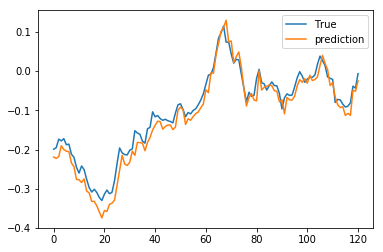

In [18]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='prediction')
ax.legend()
plt.show()